######  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#ff00ff">Logistic Regression

<font color=darkblue>

###### <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#b9662c;">Import Libraries
<a id='Import libraries'></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

###### <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#80964f;">Import Dataset
<a id='Import libraries'></a>

In [2]:
lrdat  = pd.read_csv('/Users/preethamvignesh/Downloads/ML_classwork/Week3strt/pima-indians-diabetes.csv') 
lrdat.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
lrdat.shape

(768, 9)

In [4]:
lrdat.isnull().values.any() # If there are any null values in data set

False

In [5]:
lrdat.describe() #statistic for each column

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


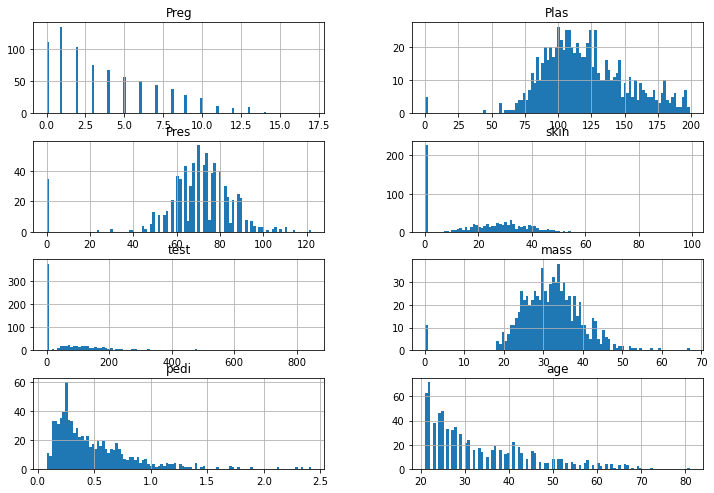

In [6]:
columns = list(lrdat)[0:-1] # Excluding Outcome column which has only 
lrdat[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 
# Histogram of first 8 columns

###### <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#b9662c;">Correlation Matrix
<a id='Import libraries'></a>

In [7]:
lrdat.corr() # It will show correlation matrix 

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


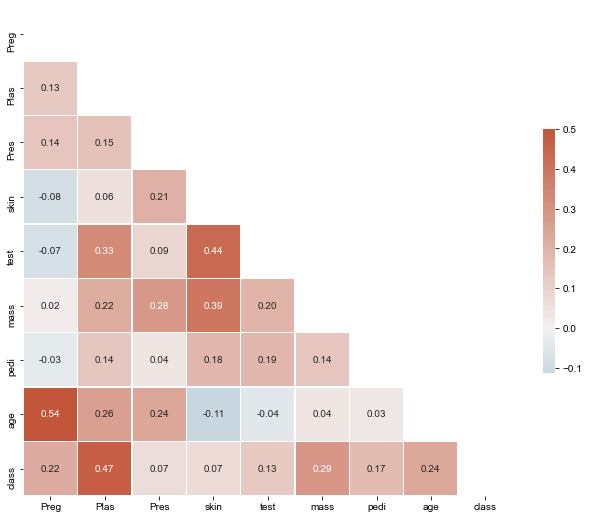

In [8]:
from string import ascii_letters
corr = lrdat.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True,fmt='.2f')
sns.set(font_scale=1.1)

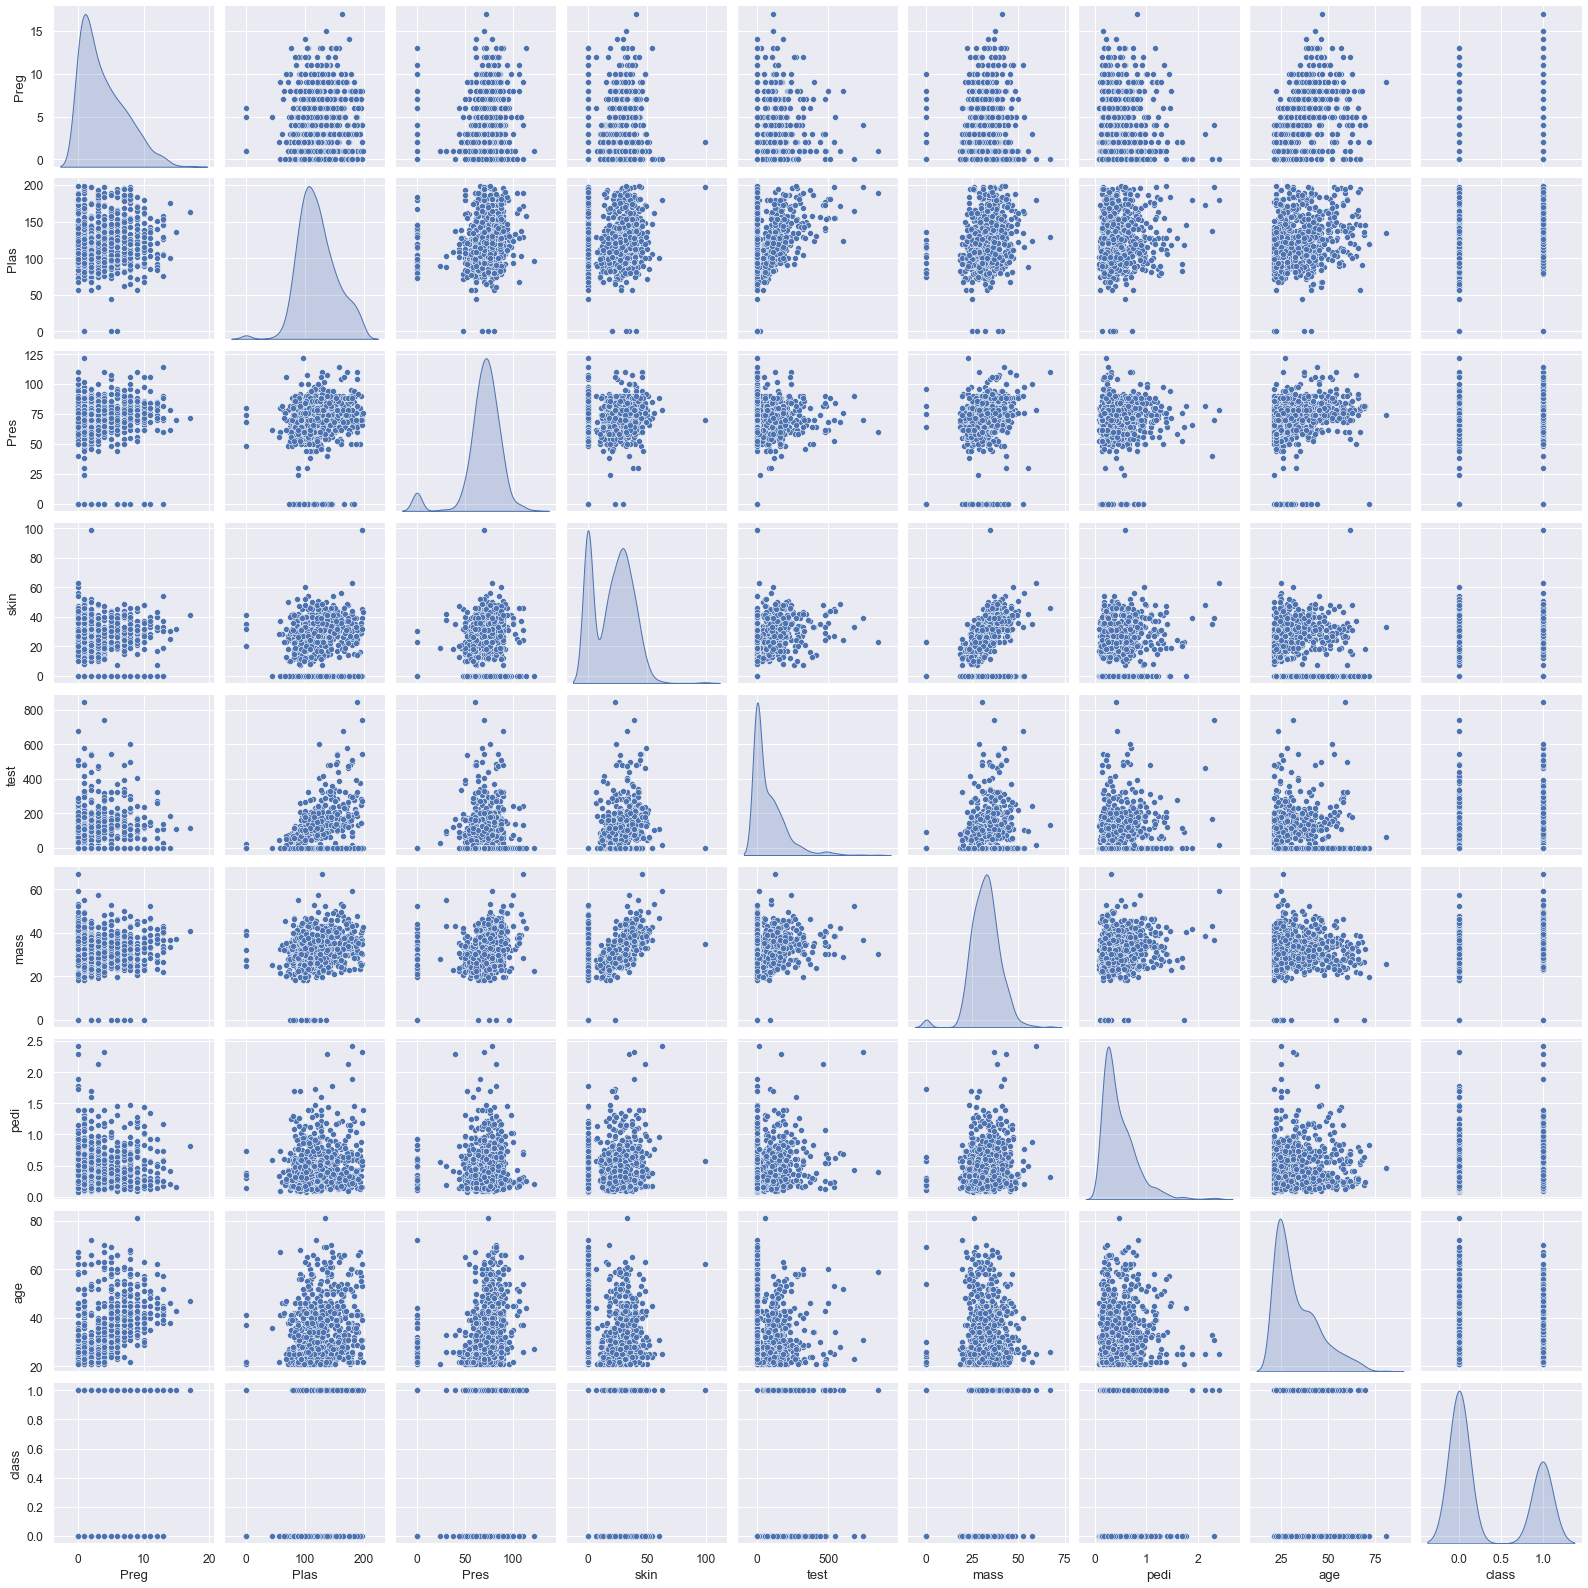

In [9]:
sns.pairplot(lrdat,diag_kind='kde')

###### <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#ce332a;">Diabatic ratio
<a id='Import libraries'></a>

In [10]:
n_true = len(lrdat.loc[lrdat['class'] == True])
n_false = len(lrdat.loc[lrdat['class'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 268 (34.90%)
Number of false cases: 500 (65.10%)


<center> <font color=red>  Dataset contain 34.9% diabatic patients  </font> <font color=blue> and rest 65.1% doesnot have diabetes.  </font> 

###### <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#3dbb6c;">Splitting Datasets
<a id='Splitting Data'></a>
    
###### <span style="font-family: Arial; font-weight:bold;font-size:0.8em;color:#c7a731;">We will use 70% of data for training and 30% for testing.
<a id='Splitting Data'></a>   

In [11]:
from sklearn.model_selection import train_test_split

X = lrdat.drop('class',axis=1)     # Predictor feature columns (8 X m)
Y = lrdat['class']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29


###### <span style="font-family: Arial; font-weight:bold;font-size:0.8em;color:#b246a6;">Lets check the splitted dataset
<a id='Splitting Data'></a>   

In [12]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(lrdat.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(lrdat.index)) * 100))

69.92% data is in training set
30.08% data is in test set


###### <span style="font-family: Arial; font-weight:bold;font-size:0.85em;color:#3dbb6c;">Now lets check diabetes True/False ratio in split data 
<a id='Splitting Data'></a>   

In [13]:
print("Original Diabetes True Values    : {0} ({1:0.2f}%)".format(len(lrdat.loc[lrdat['class'] == 1]), (len(lrdat.loc[lrdat['class'] == 1])/len(lrdat.index)) * 100))
print("Original Diabetes False Values   : {0} ({1:0.2f}%)".format(len(lrdat.loc[lrdat['class'] == 0]), (len(lrdat.loc[lrdat['class'] == 0])/len(lrdat.index)) * 100))
print("")
print("Training Diabetes True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Diabetes False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Diabetes True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Diabetes False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Diabetes True Values    : 268 (34.90%)
Original Diabetes False Values   : 500 (65.10%)

Training Diabetes True Values    : 183 (34.08%)
Training Diabetes False Values   : 354 (65.92%)

Test Diabetes True Values        : 85 (36.80%)
Test Diabetes False Values       : 146 (63.20%)



######  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#c37235">Logistic Regression

<font color=darkblue>

In [14]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3        4         5         6  \
0  0.094379  0.025543 -0.019857 -0.001549 -0.00007  0.056307  0.389514   

          7  intercept  
0  0.008663  -5.058877  


In [15]:
model_score = model.score(x_test, y_test)
print(model_score)

0.7748917748917749


###### <span style="font-family: Arial; font-weight:bold;font-size:0.95em;color:#3dbb6c;">Metric: Confusion Matrix
<a id='Splitting Data'></a>   

<AxesSubplot:>

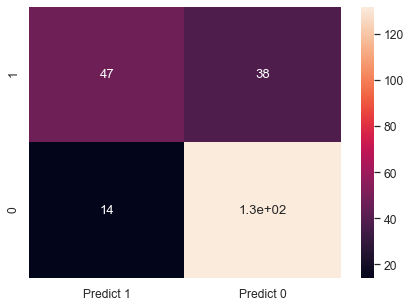

In [16]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)